# DRAFT - Data preparation & analysis

This is my original draft, showing all workings. See alternative notebooks 'Data preparation - Prevention duties', 'Initial analysis' for tidy copies.

This notebook imports data from the government homelessness stats, sheet A2P. This shows the number of prevention duties owed per local authority per quarter, broken down into reasons for homelessness.

The data is cleaned and prepared for analysis, then data from more quarters is imported and cleaned in the same way. This data is joined into a single dataframe.

In [4]:
#Setting up environment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import odfpy

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [5]:
#Loading data

df = pd.read_csv('C:/Users/lucyf/Coding/Homelessness/data/A2P_202212.csv')
df.head(30)

,"Table A2P - Number of households owed a prevention duty by reason for loss, or threat of loss, of last settled homeEngland, October to December 2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,NaN,NaN,NaN,NaN,NaN,NaN,End of private rented tenancy - assured shorthold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,End of private rented tenancy - not assured sh...,Family or friends no longer willing or able to...,Non-violent relationship breakdown with partner,Domestic abuse,Other violence or harrassment,NaN,End of social rented tenancy,NaN,NaN,NaN,NaN,Eviction from supported housing,NaN,NaN,NaN,NaN,Left institution with no accommodation available,Required to leave accommodation provided by Ho...,Other reasons / not known6
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Number of households
2,NaN,NaN,NaN,NaN,Total owed a prevention duty1,NaN,End of assured shorthold (AST) private rented ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,End of non-AST private rented tenancy,Family or friends no longer willing or able to...,Non-violent relationship breakdown with partner,Domestic abuse,Other violence or harrassment,NaN,"End of social rented tenancy, due to..",NaN,NaN,NaN,NaN,"Eviction from supported housing, due to..",NaN,NaN,NaN,NaN,Left institution with no accommodation available,Required to leave accommodation provided by Ho...,Other reasons / not known5
3,NaN,NaN,NaN,NaN,NaN,NaN,Total end of AST,NaN,Of which:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total end of social rented tenancy,Of which:,NaN,NaN,NaN,Total evicted from supported housing,Of which:,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Rent arrears, due to..",NaN,NaN,NaN,NaN,NaN,"Breach of tenancy, not related to rent arrears",Landlord wishing to sell or re-let the property,Tenant complained to the council / agent / lan...,Illegal eviction,Tenant abandoned property,Other reasons / not known,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rent arrears2,"Breach of tenancy, not related to rent arrears",Other reasons / not known3,NaN,NaN,Rent arrears,"Breach of tenancy or licence, not related to r...",Other reasons / not known4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tenant difficulty budgeting or making other pa...,Increase in rent,Reduction in employment income,Changes in benefit entitlement,Change in personal circumstances,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,E92000001,ENGLAND,NaN,NaN,31800,NaN,11790,NaN,670,170,210,200,640,NaN,200,7470,170,60,90,1900,NaN,1480,8550,1540,2240,520,NaN,1510,1000,110,390,NaN,1200,110,390,690,NaN,680,670,1640
7,E12000007,London,NaN,NaN,5850,NaN,2420,NaN,120,50,20,110,100,NaN,20,1500,50,10,10,420,NaN,300,1680,140,270,90,NaN,350,280,10,60,NaN,130,10,40,90,NaN,60,90,330
8,-,Rest of England,NaN,NaN,25950,NaN,9370,NaN,550,120,190,100,540,NaN,170,5970,120,50,80,1470,NaN,1180,6870,1400,1980,430,NaN,1160,720,100,330,NaN,1060,100,360,600,NaN,620,580,1300
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail(20)

,"Table A2P - Number of households owed a prevention duty by reason for loss, or threat of loss, of last settled homeEngland, October to December 2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
325,E07000238,Wychavon,NaN,NaN,35,NaN,14,NaN,0,0,0,0,0,NaN,0,12,0,0,0,2,NaN,0,4,1,0,1,NaN,0,0,0,0,NaN,1,0,1,0,NaN,0,0,14
326,E07000128,Wyre,NaN,NaN,58,NaN,20,NaN,1,1,1,0,1,NaN,0,13,2,0,0,1,NaN,5,13,3,7,2,NaN,1,1,0,0,NaN,1,0,1,0,NaN,0,1,5
327,E07000239,Wyre Forest,NaN,NaN,28,NaN,13,NaN,0,0,0,0,1,NaN,0,11,0,0,0,1,NaN,1,5,3,0,1,NaN,0,0,0,0,NaN,4,0,0,4,NaN,0,0,1
328,E06000014,York,NaN,NaN,112,NaN,38,NaN,1,1,1,0,0,NaN,1,27,0,0,1,6,NaN,3,35,18,4,1,NaN,2,1,1,0,NaN,6,0,4,2,NaN,4,0,1
329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,1,The outcome of the assessment whether the appl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,2,Includes rent arrears due to change in persona...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,3,"Includes tenant abandoned property, other or n...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,4,Includes no longer eligible for supported hous...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Removing header rows at the top
df.drop(df.index[:6], inplace=True)

#Removing notes rows at the bottom
df.drop(df.index[323:], inplace=True)

#Resetting index
df = df.reset_index(drop=True)

In [8]:
df.tail(20)

,"Table A2P - Number of households owed a prevention duty by reason for loss, or threat of loss, of last settled homeEngland, October to December 2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
303,E07000127,West Lancashire,NaN,NaN,25,NaN,14,NaN,0,0,1,0,2,NaN,0,11,0,0,0,0,NaN,1,3,0,3,0,NaN,0,0,0,0,NaN,0,0,0,0,NaN,1,0,3
304,E07000142,West Lindsey,NaN,NaN,73,NaN,26,NaN,4,1,0,0,2,NaN,2,11,0,0,2,4,NaN,4,11,10,8,0,NaN,8,6,0,2,NaN,3,1,1,1,NaN,0,0,3
305,E06000062,West Northamptonshire,NaN,NaN,214,NaN,64,NaN,4,1,3,0,2,NaN,0,47,0,1,0,6,NaN,6,60,5,5,1,NaN,15,14,0,1,NaN,22,2,4,16,NaN,31,0,5
306,E07000181,West Oxfordshire,NaN,NaN,31,NaN,4,NaN,0,0,0,0,0,NaN,0,3,0,0,0,1,NaN,2,11,6,1,1,NaN,0,0,0,0,NaN,0,0,0,0,NaN,2,0,4
307,E07000245,West Suffolk,NaN,NaN,60,NaN,27,NaN,1,1,0,0,0,NaN,0,17,0,0,0,8,NaN,0,8,0,5,1,NaN,12,11,0,1,NaN,1,0,0,1,NaN,0,0,6
308,E09000033,Westminster,NaN,NaN,128,NaN,93,NaN,3,1,1,1,1,NaN,1,80,0,0,0,5,NaN,4,10,0,1,0,NaN,7,3,0,4,NaN,1,0,0,1,NaN,0,0,12
309,E08000010,Wigan,NaN,NaN,276,NaN,98,NaN,3,1,3,2,10,NaN,2,60,3,0,2,12,NaN,23,68,9,24,6,NaN,6,0,2,4,NaN,6,0,3,3,NaN,1,27,8
310,E06000054,Wiltshire,NaN,NaN,165,NaN,41,NaN,0,0,0,0,0,NaN,1,32,0,0,0,8,NaN,8,60,8,16,4,NaN,8,3,1,4,NaN,6,0,3,3,NaN,1,1,12
311,E07000094,Winchester,NaN,NaN,60,NaN,17,NaN,2,0,1,0,1,NaN,0,10,1,0,0,2,NaN,1,25,3,1,1,NaN,6,4,1,1,NaN,1,0,1,0,NaN,3,0,2
312,E06000040,Windsor & Maidenhead,NaN,NaN,31,NaN,10,NaN,0,0,1,0,0,NaN,0,7,0,0,0,2,NaN,1,12,5,2,0,NaN,0,0,0,0,NaN,0,0,0,0,NaN,0,0,1


In [9]:
#Checking the total number of rows in the dataset
df.shape[0]

323

In [10]:
#Checking how many null values per column, at this point looking for blank columns where all values are null
df.isnull().sum()

Table A2P - Number of households owed a prevention duty by reason for loss, or threat of loss, of last settled homeEngland, October to December 2022      2
Unnamed: 1                                                                                                                                                2
Unnamed: 2                                                                                                                                              323
Unnamed: 3                                                                                                                                              323
Unnamed: 4                                                                                                                                                2
Unnamed: 5                                                                                                                                              323
Unnamed: 6                                                      

In [11]:
#Dropping spacer columns where all values are null

blank_columns = df.columns[df.isnull().sum() == df.shape[0]].tolist()
df.drop(blank_columns, axis=1, inplace=True)

df.head()

,"Table A2P - Number of households owed a prevention duty by reason for loss, or threat of loss, of last settled homeEngland, October to December 2022",Unnamed: 1,Unnamed: 4,Unnamed: 6,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,E92000001,ENGLAND,31800,11790,670,170,210,200,640,200,7470,170,60,90,1900,1480,8550,1540,2240,520,1510,1000,110,390,1200,110,390,690,680,670,1640
1,E12000007,London,5850,2420,120,50,20,110,100,20,1500,50,10,10,420,300,1680,140,270,90,350,280,10,60,130,10,40,90,60,90,330
2,-,Rest of England,25950,9370,550,120,190,100,540,170,5970,120,50,80,1470,1180,6870,1400,1980,430,1160,720,100,330,1060,100,360,600,620,580,1300
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E12000001,North East,2320,580,60,0,10,10,30,10,330,10,10,10,110,100,640,170,240,80,100,50,0,40,90,10,40,40,50,140,130


In [12]:
#Dropping spacer rows, where Unnamed:1 (local authority) column is null

df.dropna(subset=['Unnamed: 1'], axis=0, inplace=True)
df = df.reset_index(drop=True)

df.head()

,"Table A2P - Number of households owed a prevention duty by reason for loss, or threat of loss, of last settled homeEngland, October to December 2022",Unnamed: 1,Unnamed: 4,Unnamed: 6,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,E92000001,ENGLAND,31800,11790,670,170,210,200,640,200,7470,170,60,90,1900,1480,8550,1540,2240,520,1510,1000,110,390,1200,110,390,690,680,670,1640
1,E12000007,London,5850,2420,120,50,20,110,100,20,1500,50,10,10,420,300,1680,140,270,90,350,280,10,60,130,10,40,90,60,90,330
2,-,Rest of England,25950,9370,550,120,190,100,540,170,5970,120,50,80,1470,1180,6870,1400,1980,430,1160,720,100,330,1060,100,360,600,620,580,1300
3,E12000001,North East,2320,580,60,0,10,10,30,10,330,10,10,10,110,100,640,170,240,80,100,50,0,40,90,10,40,40,50,140,130
4,E12000002,North West,4350,1570,50,20,20,20,90,30,1100,30,10,10,210,240,1190,190,340,50,180,120,20,50,130,10,40,90,110,160,180


In [13]:
#Renaming columns

df.columns=['ONS_code', 'local_authority', 'total_prevention_duty', 'AST_total', 'AST_arrears_budgeting', 'AST_arrears_rent_increase', 'AST_arrears_employment_reduction', 'AST_arrears_benefit_reduction', 'AST_arrears_personal_circs', 'AST_breach', 'AST_LL_sell_relet', 'AST_disrepair_complaint', 'AST_illegal_eviction', 'AST_abandoned', 'AST_other', 'non_AST_private_let', 'family_friends', 'relationship_breakdown', 'domestic_violence', 'other_violence', 'social_total', 'social_arrears', 'social_breach', 'social_other', 'supported_total', 'supported_arrears', 'supported_breach', 'supported_other', 'institution', 'asylum_accommodation', 'other']

In [14]:
#Adding columns with the quarter and year

df['year'] = 2022
df['quarter'] = 3

In [15]:
#Rows 0-11 are large areas rather than single local authorities, so they will skew my analysis

#Saving these rows to a separate dataframe in case I want to use them later
region_df = df[:12]

#Then dropping them from the main dataframe
df = df[12:]
df = df.reset_index(drop=True)

In [16]:
#Creating function for all the above steps 

def clean_df(df, year, quarter):
    df.drop(df.index[:6], inplace=True)
    df.drop(df.index[323:], inplace=True)
    blank_columns = df.columns[df.isnull().sum() == df.shape[0]].tolist()
    df.drop(blank_columns, axis=1, inplace=True)
    df.dropna(subset=['Unnamed: 1'], axis=0, inplace=True)
    df.columns=['ONS_code', 'local_authority', 'total_prevention_duty', 'AST_total', 'AST_arrears_budgeting', 'AST_arrears_rent_increase', 'AST_arrears_employment_reduction', 'AST_arrears_benefit_reduction', 'AST_arrears_personal_circs', 'AST_breach', 'AST_LL_sell_relet', 'AST_disrepair_complaint', 'AST_illegal_eviction', 'AST_abandoned', 'AST_other', 'non_AST_private_let', 'family_friends', 'relationship_breakdown', 'domestic_violence', 'other_violence', 'social_total', 'social_arrears', 'social_breach', 'social_other', 'supported_total', 'supported_arrears', 'supported_breach', 'supported_other', 'institution', 'asylum_accommodation', 'other']
    region_df = df[:12]
    df = df[12:]
    df = df.reset_index(drop=True)
    df['Year'] = year
    df['Quarter'] = quarter
    return df, region_df

In [18]:
#Testing my strip_rename function with stats from Jul-Sept 2022

df_22Q2 = pd.read_csv('C:/Users/lucyf/Coding/Homelessness/data/A2P_202209.csv')

df_22Q2, region_22Q2 = clean_df(df_22Q2, 2022, 2)

df_22Q2.head(20)

,ONS_code,local_authority,total_prevention_duty,AST_total,AST_arrears_budgeting,AST_arrears_rent_increase,AST_arrears_employment_reduction,AST_arrears_benefit_reduction,AST_arrears_personal_circs,AST_breach,AST_LL_sell_relet,AST_disrepair_complaint,AST_illegal_eviction,AST_abandoned,AST_other,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,social_arrears,social_breach,social_other,supported_total,supported_arrears,supported_breach,supported_other,institution,asylum_accommodation,other,Year,Quarter
0,E07000223,Adur,13,7,0,0,0,0,0,0,6,0,0,0,1,1,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,2022,2
1,E07000026,Allerdale,59,27,2,0,0,0,1,2,19,0,0,1,2,2,9,5,4,1,4,1,0,3,1,0,0,1,0,0,6,2022,2
2,E07000032,Amber Valley,87,25,0,0,0,0,0,0,22,0,0,0,3,1,35,7,15,0,1,0,0,1,2,1,1,0,0,0,1,2022,2
3,E07000224,Arun,93,59,6,0,1,2,3,3,37,0,0,0,7,3,17,3,1,3,2,0,1,1,3,0,2,1,0,0,2,2022,2
4,E07000170,Ashfield,32,22,0,0,0,0,3,0,18,0,0,0,1,2,3,1,0,0,1,0,0,1,0,0,0,0,0,0,3,2022,2
5,E07000105,Ashford,81,43,1,0,2,0,3,1,25,0,0,0,11,10,15,6,1,2,0,0,0,0,1,0,0,1,2,0,1,2022,2
6,E07000200,Babergh,56,22,1,0,0,0,2,0,13,0,1,0,5,1,6,4,7,2,12,7,1,4,0,0,0,0,0,0,2,2022,2
7,E09000002,Barking & Dagenham,212,64,2,0,2,1,4,1,48,0,1,0,5,7,80,5,14,8,4,2,1,1,5,0,1,4,2,7,16,2022,2
8,E09000003,Barnet,232,114,4,1,3,3,6,0,64,1,0,0,32,12,54,3,12,4,1,1,0,0,2,0,0,2,1,0,29,2022,2
9,E08000016,Barnsley,86,41,3,0,1,0,2,1,30,1,0,0,3,0,10,2,3,0,1,0,0,1,4,0,4,0,21,2,2,2022,2


In [19]:
#Returning to original Q2 dataset

#Checking for null values

df.isnull().sum()

ONS_code                            0
local_authority                     0
total_prevention_duty               0
AST_total                           0
AST_arrears_budgeting               0
AST_arrears_rent_increase           0
AST_arrears_employment_reduction    0
AST_arrears_benefit_reduction       0
AST_arrears_personal_circs          0
AST_breach                          0
AST_LL_sell_relet                   0
AST_disrepair_complaint             0
AST_illegal_eviction                0
AST_abandoned                       0
AST_other                           0
non_AST_private_let                 0
family_friends                      0
relationship_breakdown              0
domestic_violence                   0
other_violence                      0
social_total                        0
social_arrears                      0
social_breach                       0
social_other                        0
supported_total                     0
supported_arrears                   0
supported_br

In [20]:
#Checking data types

df.dtypes

#These should all be numerical except ONS code and local_authority

ONS_code                            object
local_authority                     object
total_prevention_duty               object
AST_total                           object
AST_arrears_budgeting               object
AST_arrears_rent_increase           object
AST_arrears_employment_reduction    object
AST_arrears_benefit_reduction       object
AST_arrears_personal_circs          object
AST_breach                          object
AST_LL_sell_relet                   object
AST_disrepair_complaint             object
AST_illegal_eviction                object
AST_abandoned                       object
AST_other                           object
non_AST_private_let                 object
family_friends                      object
relationship_breakdown              object
domestic_violence                   object
other_violence                      object
social_total                        object
social_arrears                      object
social_breach                       object
social_othe

In [21]:
## Tried converting numerical columns to the correct datatype, but got an error as ".." has been used to represent null values

#Replaced ".." string with null value, then converted columns to floats

for column in df.columns[2:]:
    df[column].replace("..", np.nan, inplace=True)
    df[column] = df[column].astype(float)

#Checking data types are now correct:
df.dtypes

ONS_code                             object
local_authority                      object
total_prevention_duty               float64
AST_total                           float64
AST_arrears_budgeting               float64
AST_arrears_rent_increase           float64
AST_arrears_employment_reduction    float64
AST_arrears_benefit_reduction       float64
AST_arrears_personal_circs          float64
AST_breach                          float64
AST_LL_sell_relet                   float64
AST_disrepair_complaint             float64
AST_illegal_eviction                float64
AST_abandoned                       float64
AST_other                           float64
non_AST_private_let                 float64
family_friends                      float64
relationship_breakdown              float64
domestic_violence                   float64
other_violence                      float64
social_total                        float64
social_arrears                      float64
social_breach                   

In [22]:
#Checking again for null values

df.isnull().sum()

ONS_code                             0
local_authority                      0
total_prevention_duty               20
AST_total                           20
AST_arrears_budgeting               20
AST_arrears_rent_increase           20
AST_arrears_employment_reduction    20
AST_arrears_benefit_reduction       20
AST_arrears_personal_circs          20
AST_breach                          20
AST_LL_sell_relet                   20
AST_disrepair_complaint             20
AST_illegal_eviction                20
AST_abandoned                       20
AST_other                           20
non_AST_private_let                 20
family_friends                      20
relationship_breakdown              20
domestic_violence                   20
other_violence                      20
social_total                        20
social_arrears                      20
social_breach                       20
social_other                        20
supported_total                     20
supported_arrears        

In [23]:
#Filling null values with the mean of the column, rounded to the nearest integer

for column in df:
    if df[column].isnull().sum() >0:
        df[column].fillna(round(df[column].mean()), inplace=True)

In [24]:
#Adding to previously defined clean_df function, to include the above cleaning steps

def clean_df_A2P(df, year, quarter):
    
    #Dropping blank spacer columns
    blank_columns = df.columns[df.isnull().sum() == df.shape[0]].tolist()
    df.drop(blank_columns, axis=1, inplace=True)
    
    #Dropping blank, header and note rows
    df.dropna(subset=[df.columns[0]], axis=0, inplace=True)
    df = df[df[df.columns[0]].str.contains('^E\d')]
    
    #Renaming columns
    df.columns=['ONS_code', 'local_authority', 'total_prevention_duty', 'AST_total', 'AST_arrears_budgeting', 'AST_arrears_rent_increase', 'AST_arrears_employment_reduction', 'AST_arrears_benefit_reduction', 'AST_arrears_personal_circs', 'AST_breach', 'AST_LL_sell_relet', 'AST_disrepair_complaint', 'AST_illegal_eviction', 'AST_abandoned', 'AST_other', 'non_AST_private_let', 'family_friends', 'relationship_breakdown', 'domestic_violence', 'other_violence', 'social_total', 'social_arrears', 'social_breach', 'social_other', 'supported_total', 'supported_arrears', 'supported_breach', 'supported_other', 'institution', 'asylum_accommodation', 'other']
    
    #Removing the aggregated regional data
    region_df = df[:11]
    df = df[11:]
    df = df.reset_index(drop=True)
    
    #Finding null values and replacing the string representation
    for column in df.columns[2:]:
        df[column].replace("..", np.nan, inplace=True)
        df[column] = df[column].astype(float)
    
    #Setting new columns with the relevant year and quarter
    df['year'] = int(year)
    df['quarter'] = int(quarter)
    
    #Filling null values with the mean of the column
    for column in df:
        if df[column].isnull().sum() >0:
            df[column].fillna(round(df[column].mean()), inplace=True)
    
    #Adding columns showing percentage of total for each reason for homelessness
    df_categories = df[['ONS_code', 'local_authority', 'total_prevention_duty', 'AST_total', 'non_AST_private_let', 'family_friends', 'relationship_breakdown', 'domestic_violence', 'other_violence', 'social_total', 'supported_total', 'institution', 'asylum_accommodation', 'other']]
    homelessness_reasons = df_categories.columns[3:]
    for column in homelessness_reasons:
        df['percentage_' + column] = (df[column] / df['total_prevention_duty']).round(2)
   
    return df, region_df

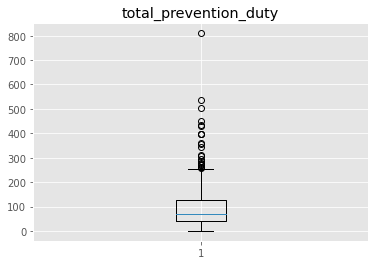

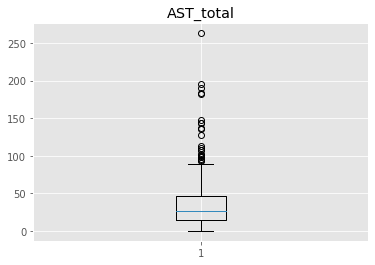

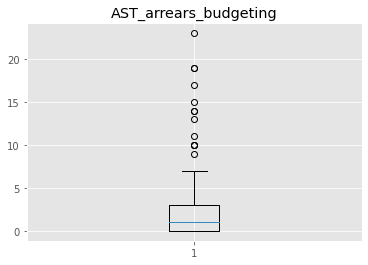

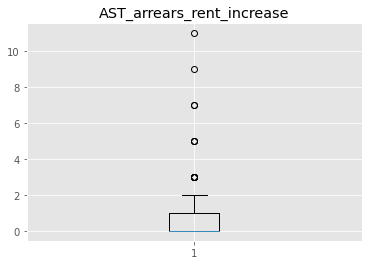

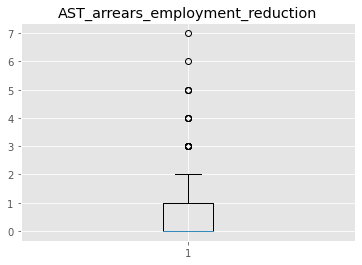

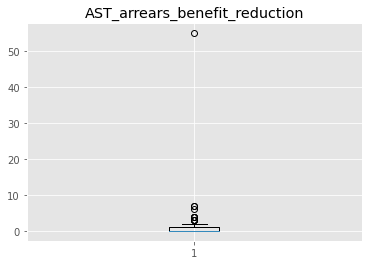

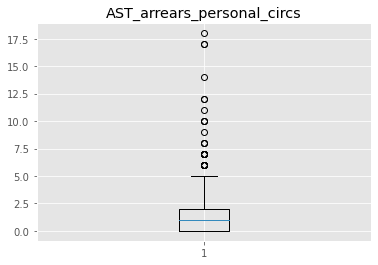

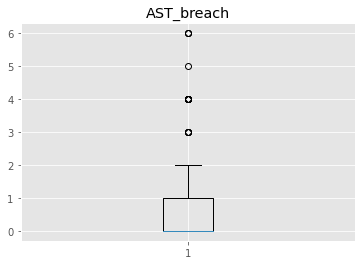

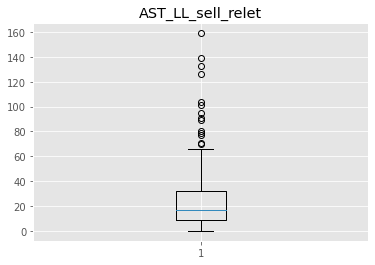

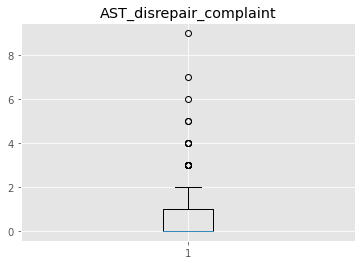

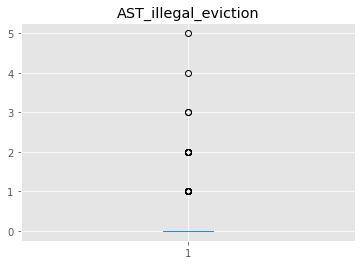

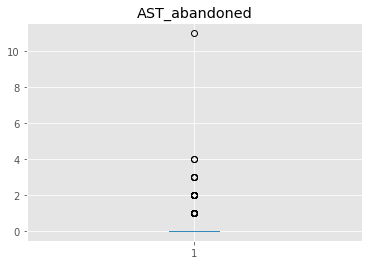

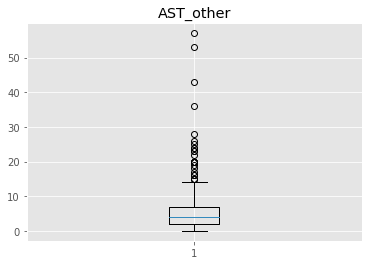

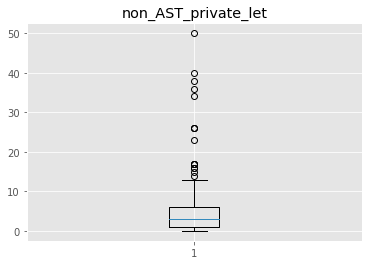

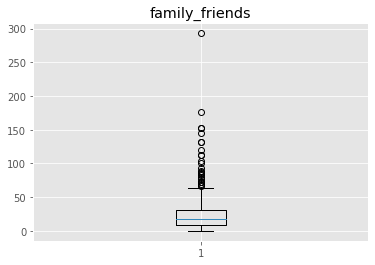

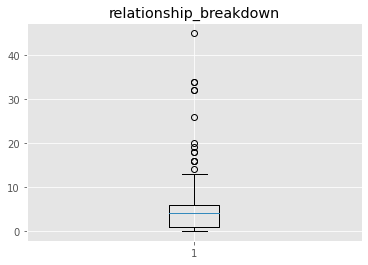

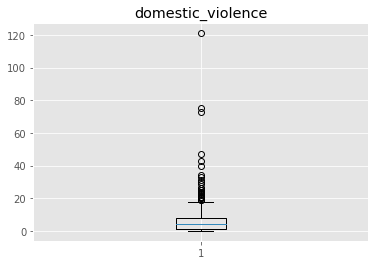

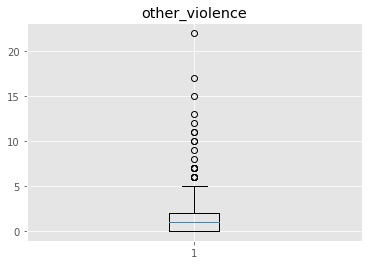

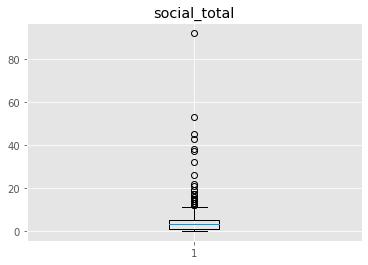

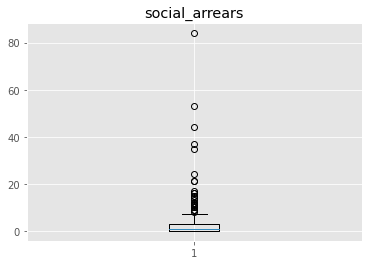

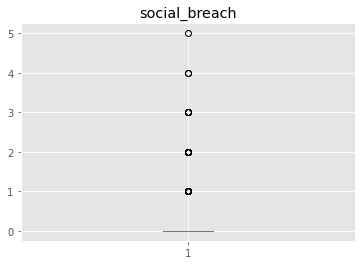

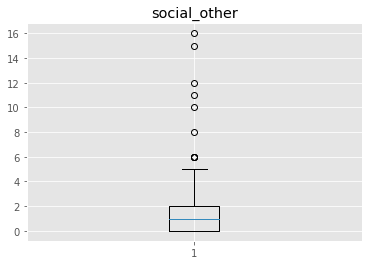

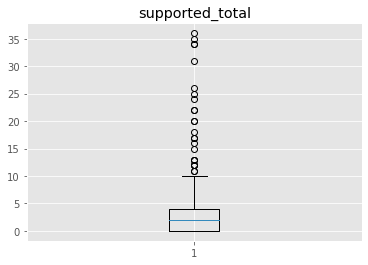

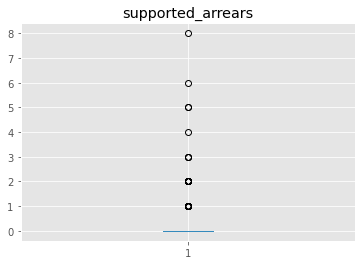

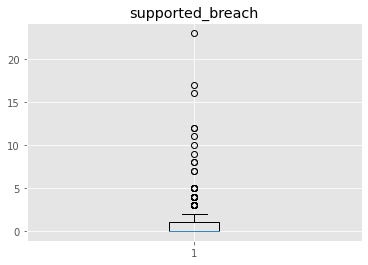

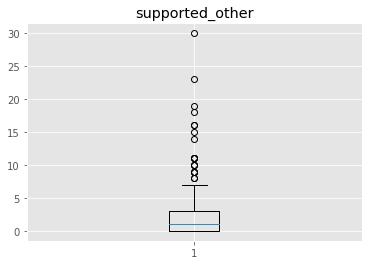

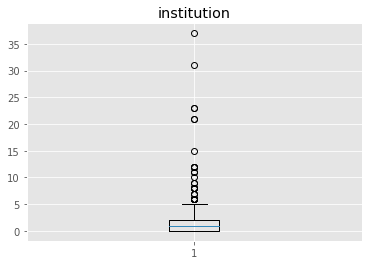

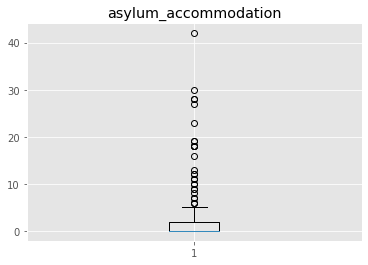

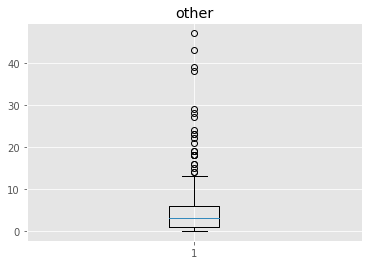

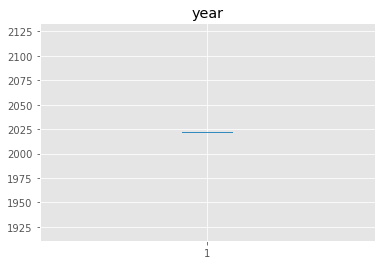

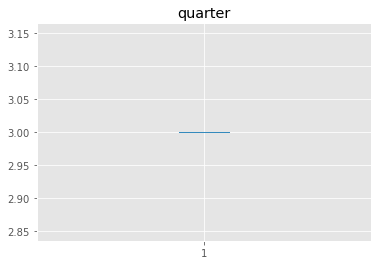

<Figure size 432x288 with 0 Axes>

In [25]:
#Now checking each column for outliers using boxplots

for column in df:
    if df[column].dtype == 'float64':
        plt.boxplot(df[column])
        plt.title(column)
        plt.show()
        plt.clf()

In [26]:
#Checking a few particularly high values by displaying the rows with the 5 highest values in the column

columns_to_check = ['total_prevention_duty', 'AST_total', 'AST_arrears_benefit_reduction', 'AST_abandoned', 'family_friends', 'domestic_violence']

for column in columns_to_check:
    print(column)
    display(df.nlargest(5, column))

total_prevention_duty


,ONS_code,local_authority,total_prevention_duty,AST_total,AST_arrears_budgeting,AST_arrears_rent_increase,AST_arrears_employment_reduction,AST_arrears_benefit_reduction,AST_arrears_personal_circs,AST_breach,AST_LL_sell_relet,AST_disrepair_complaint,AST_illegal_eviction,AST_abandoned,AST_other,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,social_arrears,social_breach,social_other,supported_total,supported_arrears,supported_breach,supported_other,institution,asylum_accommodation,other,year,quarter
143,E08000035,Leeds,810.0,190.0,5.0,0.0,5.0,3.0,5.0,3.0,139.0,0.0,3.0,2.0,25.0,7.0,293.0,45.0,121.0,13.0,8.0,1.0,2.0,5.0,35.0,0.0,5.0,30.0,37.0,42.0,19.0,2022.0,3.0
17,E08000025,Birmingham,538.0,148.0,3.0,2.0,2.0,2.0,14.0,1.0,95.0,4.0,2.0,0.0,23.0,34.0,152.0,16.0,75.0,11.0,11.0,9.0,0.0,2.0,36.0,1.0,16.0,19.0,12.0,4.0,39.0,2022.0,3.0
154,E08000003,Manchester,503.0,263.0,4.0,7.0,3.0,4.0,18.0,4.0,159.0,9.0,1.0,1.0,53.0,15.0,103.0,12.0,43.0,3.0,15.0,7.0,2.0,6.0,5.0,2.0,0.0,3.0,5.0,28.0,11.0,2022.0,3.0
146,E09000023,Lewisham,449.0,143.0,6.0,2.0,1.0,2.0,7.0,3.0,101.0,1.0,2.0,0.0,18.0,17.0,153.0,14.0,26.0,12.0,17.0,10.0,1.0,6.0,8.0,0.0,5.0,3.0,8.0,4.0,47.0,2022.0,3.0
38,E06000060,Buckinghamshire,436.0,110.0,5.0,3.0,4.0,1.0,12.0,2.0,62.0,3.0,2.0,1.0,15.0,36.0,112.0,32.0,24.0,15.0,26.0,21.0,2.0,3.0,12.0,5.0,4.0,3.0,8.0,23.0,38.0,2022.0,3.0


AST_total


,ONS_code,local_authority,total_prevention_duty,AST_total,AST_arrears_budgeting,AST_arrears_rent_increase,AST_arrears_employment_reduction,AST_arrears_benefit_reduction,AST_arrears_personal_circs,AST_breach,AST_LL_sell_relet,AST_disrepair_complaint,AST_illegal_eviction,AST_abandoned,AST_other,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,social_arrears,social_breach,social_other,supported_total,supported_arrears,supported_breach,supported_other,institution,asylum_accommodation,other,year,quarter
154,E08000003,Manchester,503.0,263.0,4.0,7.0,3.0,4.0,18.0,4.0,159.0,9.0,1.0,1.0,53.0,15.0,103.0,12.0,43.0,3.0,15.0,7.0,2.0,6.0,5.0,2.0,0.0,3.0,5.0,28.0,11.0,2022.0,3.0
141,E09000022,Lambeth,345.0,196.0,19.0,3.0,0.0,55.0,1.0,1.0,104.0,1.0,0.0,0.0,12.0,3.0,54.0,3.0,24.0,1.0,53.0,53.0,0.0,0.0,3.0,0.0,1.0,2.0,0.0,2.0,6.0,2022.0,3.0
143,E08000035,Leeds,810.0,190.0,5.0,0.0,5.0,3.0,5.0,3.0,139.0,0.0,3.0,2.0,25.0,7.0,293.0,45.0,121.0,13.0,8.0,1.0,2.0,5.0,35.0,0.0,5.0,30.0,37.0,42.0,19.0,2022.0,3.0
77,E09000009,Ealing,355.0,184.0,6.0,5.0,1.0,7.0,8.0,0.0,126.0,4.0,3.0,4.0,20.0,26.0,89.0,2.0,15.0,2.0,5.0,5.0,0.0,0.0,4.0,0.0,0.0,4.0,4.0,6.0,18.0,2022.0,3.0
144,E06000016,Leicester,398.0,182.0,10.0,3.0,2.0,0.0,10.0,0.0,133.0,3.0,0.0,1.0,20.0,2.0,132.0,13.0,23.0,5.0,6.0,1.0,0.0,5.0,9.0,0.0,0.0,9.0,2.0,11.0,13.0,2022.0,3.0


AST_arrears_benefit_reduction


,ONS_code,local_authority,total_prevention_duty,AST_total,AST_arrears_budgeting,AST_arrears_rent_increase,AST_arrears_employment_reduction,AST_arrears_benefit_reduction,AST_arrears_personal_circs,AST_breach,AST_LL_sell_relet,AST_disrepair_complaint,AST_illegal_eviction,AST_abandoned,AST_other,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,social_arrears,social_breach,social_other,supported_total,supported_arrears,supported_breach,supported_other,institution,asylum_accommodation,other,year,quarter
141,E09000022,Lambeth,345.0,196.0,19.0,3.0,0.0,55.0,1.0,1.0,104.0,1.0,0.0,0.0,12.0,3.0,54.0,3.0,24.0,1.0,53.0,53.0,0.0,0.0,3.0,0.0,1.0,2.0,0.0,2.0,6.0,2022.0,3.0
77,E09000009,Ealing,355.0,184.0,6.0,5.0,1.0,7.0,8.0,0.0,126.0,4.0,3.0,4.0,20.0,26.0,89.0,2.0,15.0,2.0,5.0,5.0,0.0,0.0,4.0,0.0,0.0,4.0,4.0,6.0,18.0,2022.0,3.0
113,E09000014,Haringey,396.0,136.0,17.0,11.0,2.0,7.0,7.0,5.0,58.0,0.0,0.0,1.0,28.0,40.0,132.0,7.0,11.0,3.0,9.0,6.0,1.0,2.0,13.0,1.0,4.0,8.0,12.0,4.0,29.0,2022.0,3.0
108,E09000012,Hackney,186.0,53.0,3.0,2.0,1.0,6.0,1.0,0.0,20.0,0.0,0.0,0.0,20.0,6.0,62.0,2.0,10.0,9.0,19.0,15.0,3.0,1.0,9.0,4.0,1.0,4.0,2.0,4.0,10.0,2022.0,3.0
8,E09000003,Barnet,243.0,128.0,3.0,1.0,1.0,4.0,3.0,0.0,91.0,0.0,0.0,1.0,24.0,10.0,50.0,2.0,25.0,3.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,3.0,0.0,19.0,2022.0,3.0


AST_abandoned


,ONS_code,local_authority,total_prevention_duty,AST_total,AST_arrears_budgeting,AST_arrears_rent_increase,AST_arrears_employment_reduction,AST_arrears_benefit_reduction,AST_arrears_personal_circs,AST_breach,AST_LL_sell_relet,AST_disrepair_complaint,AST_illegal_eviction,AST_abandoned,AST_other,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,social_arrears,social_breach,social_other,supported_total,supported_arrears,supported_breach,supported_other,institution,asylum_accommodation,other,year,quarter
277,E08000036,Wakefield,261.0,77.0,19.0,0.0,0.0,0.0,2.0,1.0,40.0,0.0,0.0,11.0,4.0,6.0,40.0,18.0,17.0,6.0,43.0,24.0,4.0,15.0,31.0,2.0,11.0,18.0,12.0,3.0,8.0,2022.0,3.0
70,E06000015,Derby,361.0,88.0,10.0,0.0,3.0,1.0,3.0,1.0,46.0,6.0,0.0,4.0,14.0,11.0,113.0,34.0,40.0,3.0,8.0,5.0,0.0,3.0,34.0,1.0,23.0,10.0,9.0,13.0,8.0,2022.0,3.0
77,E09000009,Ealing,355.0,184.0,6.0,5.0,1.0,7.0,8.0,0.0,126.0,4.0,3.0,4.0,20.0,26.0,89.0,2.0,15.0,2.0,5.0,5.0,0.0,0.0,4.0,0.0,0.0,4.0,4.0,6.0,18.0,2022.0,3.0
26,E08000032,Bradford,293.0,89.0,4.0,0.0,0.0,2.0,5.0,2.0,41.0,2.0,4.0,3.0,26.0,3.0,88.0,10.0,24.0,10.0,8.0,2.0,3.0,3.0,24.0,2.0,8.0,14.0,5.0,18.0,14.0,2022.0,3.0
27,E07000067,Braintree,61.0,23.0,4.0,0.0,0.0,0.0,2.0,0.0,12.0,0.0,0.0,3.0,2.0,3.0,13.0,4.0,5.0,2.0,3.0,2.0,0.0,1.0,4.0,0.0,1.0,3.0,0.0,2.0,2.0,2022.0,3.0


family_friends


,ONS_code,local_authority,total_prevention_duty,AST_total,AST_arrears_budgeting,AST_arrears_rent_increase,AST_arrears_employment_reduction,AST_arrears_benefit_reduction,AST_arrears_personal_circs,AST_breach,AST_LL_sell_relet,AST_disrepair_complaint,AST_illegal_eviction,AST_abandoned,AST_other,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,social_arrears,social_breach,social_other,supported_total,supported_arrears,supported_breach,supported_other,institution,asylum_accommodation,other,year,quarter
143,E08000035,Leeds,810.0,190.0,5.0,0.0,5.0,3.0,5.0,3.0,139.0,0.0,3.0,2.0,25.0,7.0,293.0,45.0,121.0,13.0,8.0,1.0,2.0,5.0,35.0,0.0,5.0,30.0,37.0,42.0,19.0,2022.0,3.0
249,E06000004,Stockton-on-Tees,430.0,78.0,15.0,0.0,1.0,1.0,6.0,0.0,17.0,1.0,0.0,1.0,36.0,3.0,177.0,34.0,33.0,22.0,32.0,16.0,0.0,16.0,13.0,0.0,3.0,10.0,11.0,16.0,11.0,2022.0,3.0
146,E09000023,Lewisham,449.0,143.0,6.0,2.0,1.0,2.0,7.0,3.0,101.0,1.0,2.0,0.0,18.0,17.0,153.0,14.0,26.0,12.0,17.0,10.0,1.0,6.0,8.0,0.0,5.0,3.0,8.0,4.0,47.0,2022.0,3.0
17,E08000025,Birmingham,538.0,148.0,3.0,2.0,2.0,2.0,14.0,1.0,95.0,4.0,2.0,0.0,23.0,34.0,152.0,16.0,75.0,11.0,11.0,9.0,0.0,2.0,36.0,1.0,16.0,19.0,12.0,4.0,39.0,2022.0,3.0
168,E08000021,Newcastle on Tyne,399.0,107.0,14.0,0.0,2.0,2.0,2.0,1.0,57.0,1.0,5.0,3.0,20.0,9.0,145.0,32.0,21.0,10.0,14.0,9.0,1.0,4.0,12.0,1.0,9.0,2.0,7.0,30.0,12.0,2022.0,3.0


domestic_violence


,ONS_code,local_authority,total_prevention_duty,AST_total,AST_arrears_budgeting,AST_arrears_rent_increase,AST_arrears_employment_reduction,AST_arrears_benefit_reduction,AST_arrears_personal_circs,AST_breach,AST_LL_sell_relet,AST_disrepair_complaint,AST_illegal_eviction,AST_abandoned,AST_other,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,social_arrears,social_breach,social_other,supported_total,supported_arrears,supported_breach,supported_other,institution,asylum_accommodation,other,year,quarter
143,E08000035,Leeds,810.0,190.0,5.0,0.0,5.0,3.0,5.0,3.0,139.0,0.0,3.0,2.0,25.0,7.0,293.0,45.0,121.0,13.0,8.0,1.0,2.0,5.0,35.0,0.0,5.0,30.0,37.0,42.0,19.0,2022.0,3.0
17,E08000025,Birmingham,538.0,148.0,3.0,2.0,2.0,2.0,14.0,1.0,95.0,4.0,2.0,0.0,23.0,34.0,152.0,16.0,75.0,11.0,11.0,9.0,0.0,2.0,36.0,1.0,16.0,19.0,12.0,4.0,39.0,2022.0,3.0
100,E08000037,Gateshead,313.0,53.0,3.0,1.0,2.0,1.0,3.0,1.0,29.0,4.0,0.0,1.0,8.0,0.0,60.0,26.0,73.0,11.0,15.0,2.0,1.0,12.0,17.0,1.0,10.0,6.0,3.0,28.0,27.0,2022.0,3.0
281,E06000007,Warrington,174.0,32.0,0.0,0.0,0.0,0.0,1.0,0.0,26.0,0.0,1.0,0.0,4.0,9.0,48.0,6.0,47.0,0.0,13.0,4.0,5.0,4.0,8.0,0.0,2.0,6.0,5.0,2.0,4.0,2022.0,3.0
154,E08000003,Manchester,503.0,263.0,4.0,7.0,3.0,4.0,18.0,4.0,159.0,9.0,1.0,1.0,53.0,15.0,103.0,12.0,43.0,3.0,15.0,7.0,2.0,6.0,5.0,2.0,0.0,3.0,5.0,28.0,11.0,2022.0,3.0


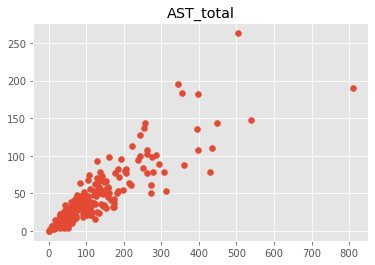

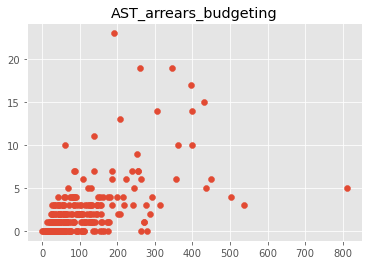

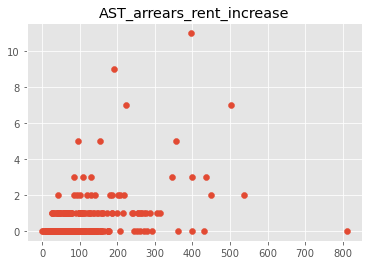

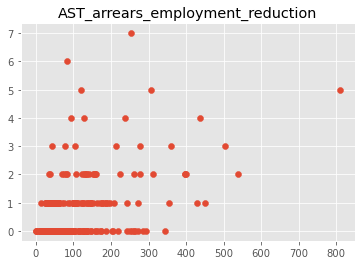

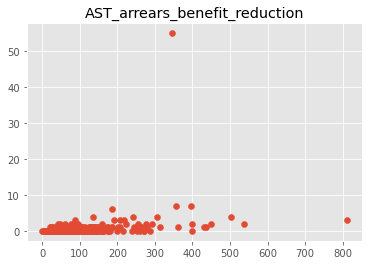

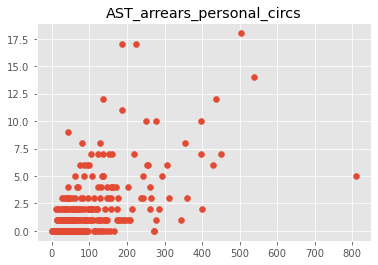

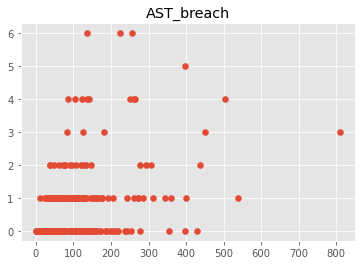

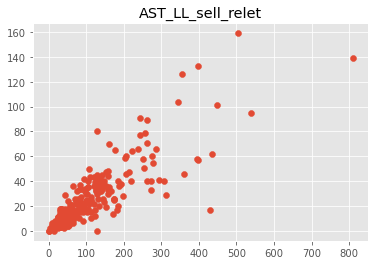

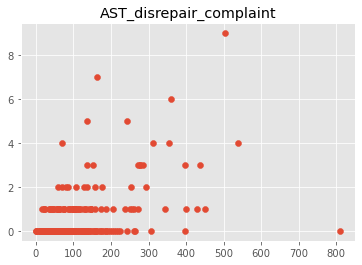

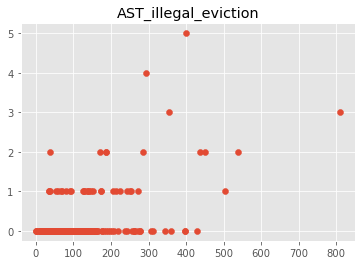

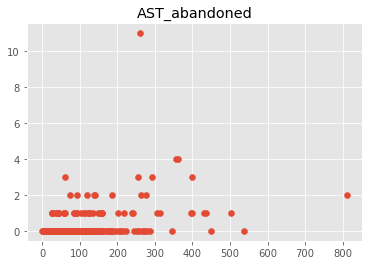

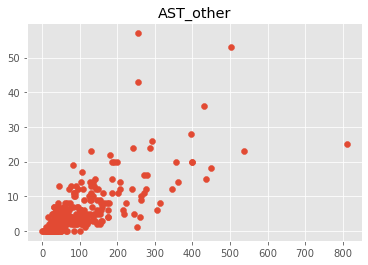

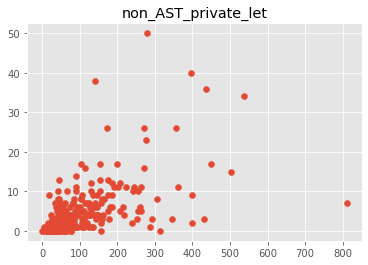

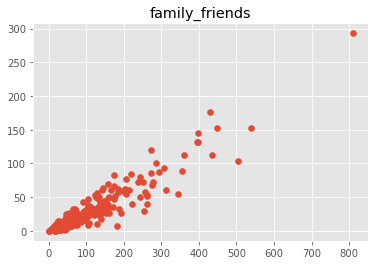

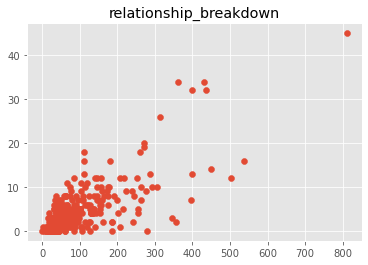

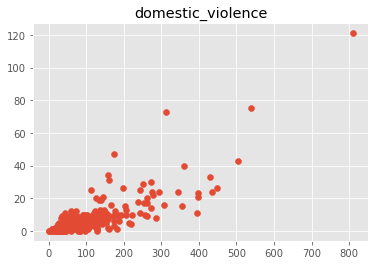

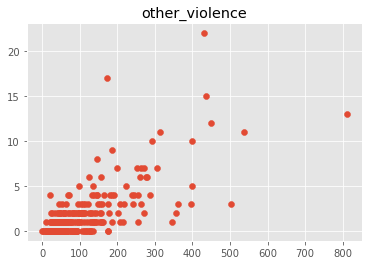

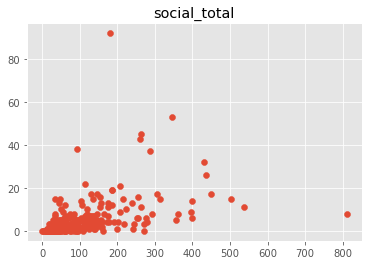

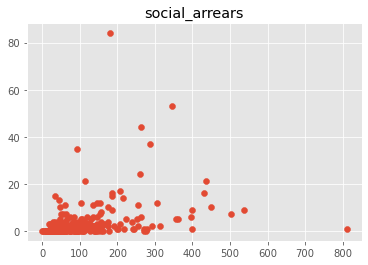

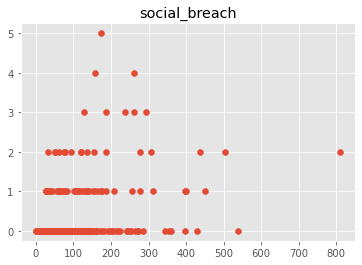

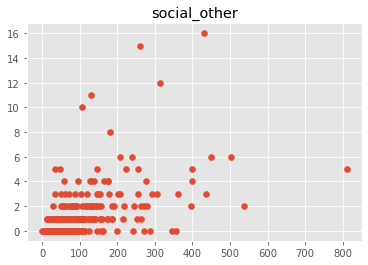

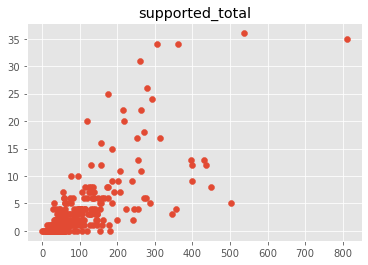

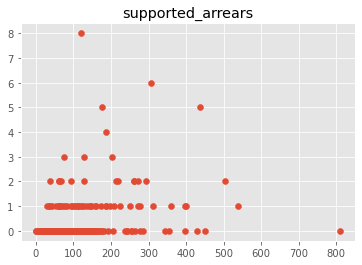

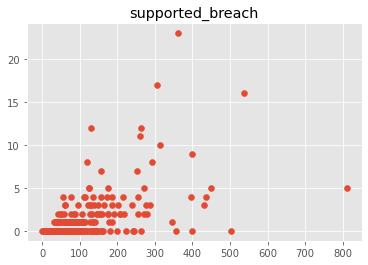

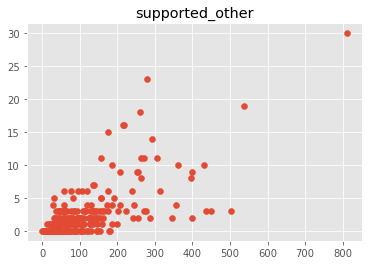

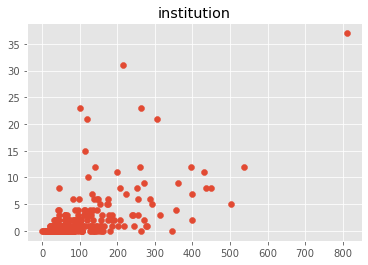

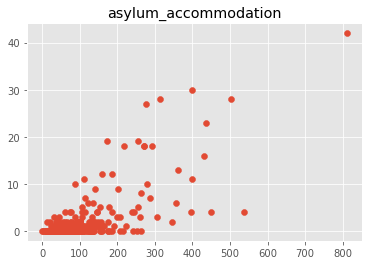

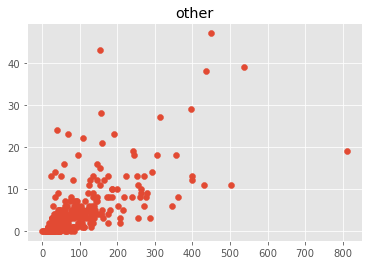

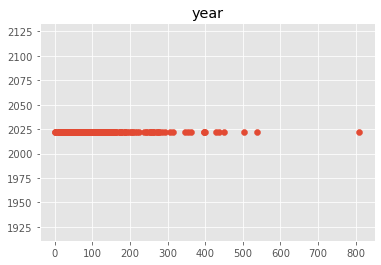

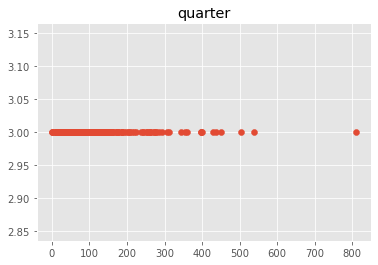

<Figure size 432x288 with 0 Axes>

In [27]:
#Creating scatterplots to check if outlier values are roughly proportionate with total prevention duties

for column in df.columns[3:]:
    plt.scatter(df['total_prevention_duty'], df[column])
    plt.title(column)
    plt.show()
    plt.clf()

In [28]:
#Filtering the dataset to just show the aggregated categories

df_categories = df[['ONS_code', 'local_authority', 'total_prevention_duty', 'AST_total', 'non_AST_private_let', 'family_friends', 'relationship_breakdown', 'domestic_violence', 'other_violence', 'social_total', 'supported_total', 'institution', 'asylum_accommodation', 'other']]
df_categories.head()

,ONS_code,local_authority,total_prevention_duty,AST_total,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,supported_total,institution,asylum_accommodation,other
0,E07000223,Adur,9.0,6.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,E07000026,Allerdale,49.0,13.0,2.0,10.0,5.0,8.0,0.0,4.0,1.0,1.0,0.0,5.0
2,E07000032,Amber Valley,63.0,21.0,1.0,23.0,8.0,4.0,0.0,0.0,3.0,1.0,0.0,2.0
3,E07000224,Arun,84.0,40.0,2.0,24.0,4.0,0.0,2.0,6.0,4.0,0.0,1.0,1.0
4,E07000170,Ashfield,51.0,31.0,1.0,6.0,3.0,7.0,0.0,0.0,0.0,1.0,0.0,2.0


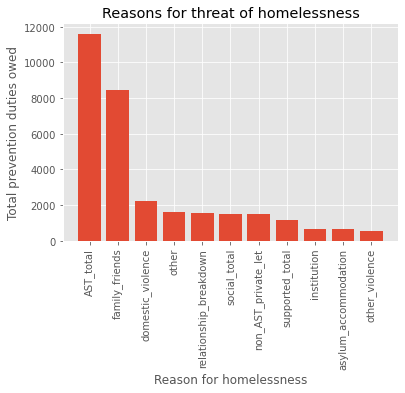

<Figure size 432x288 with 0 Axes>

In [29]:
#Plotting a bar chart showing the most common reasons for threat of homelessness

homelessness_reasons = df_categories.columns[3:]
homelessness_reasons_summed = df[homelessness_reasons].sum().sort_values(ascending=False)

plt.bar(homelessness_reasons_summed.index, homelessness_reasons_summed)
plt.xticks(rotation=90)
plt.title('Reasons for threat of homelessness')
plt.xlabel('Reason for homelessness')
plt.ylabel('Total prevention duties owed')
plt.show()
plt.clf()

In [30]:
#Calculating the above reasons for homelessness as a proportion of the total, for each local authority

for column in homelessness_reasons:
    df['percentage_' + column] = (df[column] / df['total_prevention_duty']).round(2)

In [31]:
#Showing a filtered dataframe with just the calculated percentages

df_percentages = df.filter(df.columns[0:2].tolist() + [column for column in df.columns if 'percentage' in column])

display(df_percentages.head())

df_percentages.describe()

,ONS_code,local_authority,percentage_AST_total,percentage_non_AST_private_let,percentage_family_friends,percentage_relationship_breakdown,percentage_domestic_violence,percentage_other_violence,percentage_social_total,percentage_supported_total,percentage_institution,percentage_asylum_accommodation,percentage_other
0,E07000223,Adur,0.67,0.00,0.22,0.00,0.11,0.00,0.00,0.00,0.00,0.00,0.00
1,E07000026,Allerdale,0.27,0.04,0.20,0.10,0.16,0.00,0.08,0.02,0.02,0.00,0.10
2,E07000032,Amber Valley,0.33,0.02,0.37,0.13,0.06,0.00,0.00,0.05,0.02,0.00,0.03
3,E07000224,Arun,0.48,0.02,0.29,0.05,0.00,0.02,0.07,0.05,0.00,0.01,0.01
4,E07000170,Ashfield,0.61,0.02,0.12,0.06,0.14,0.00,0.00,0.00,0.02,0.00,0.04


,percentage_AST_total,percentage_non_AST_private_let,percentage_family_friends,percentage_relationship_breakdown,percentage_domestic_violence,percentage_other_violence,percentage_social_total,percentage_supported_total,percentage_institution,percentage_asylum_accommodation,percentage_other
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,0.390227,0.050844,0.255162,0.058506,0.064903,0.015162,0.046948,0.031526,0.018312,0.013571,0.055325
std,0.136590,0.052376,0.102186,0.068680,0.051451,0.020007,0.062058,0.031008,0.027721,0.023174,0.065618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.290000,0.020000,0.190000,0.030000,0.030000,0.000000,0.010000,0.000000,0.000000,0.000000,0.020000
50%,0.370000,0.040000,0.250000,0.050000,0.060000,0.010000,0.030000,0.030000,0.010000,0.000000,0.040000
75%,0.480000,0.060000,0.310000,0.080000,0.090000,0.020000,0.060000,0.040000,0.020000,0.020000,0.070000
max,0.940000,0.470000,0.620000,1.000000,0.270000,0.190000,0.510000,0.170000,0.230000,0.140000,0.600000


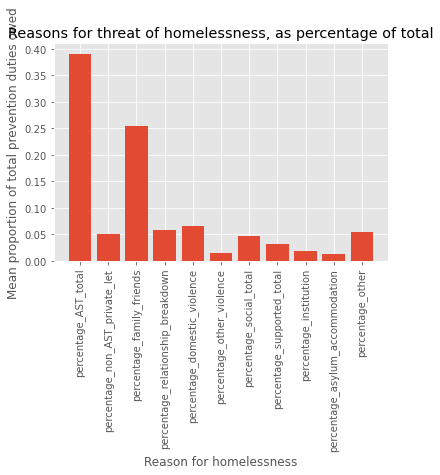

In [32]:
#Showing the calculated percentages as a bar chart

#percentages_mean = df[df_percentages.columns[2:]].mean().sort_values(ascending=False)
percentages_mean = df[df_percentages.columns[2:]].mean()

plt.bar(percentages_mean.index, percentages_mean)
plt.xticks(rotation=90)
plt.title('Reasons for threat of homelessness, as percentage of total')
plt.xlabel('Reason for homelessness')
plt.ylabel('Mean proportion of total prevention duties owed')
plt.show()

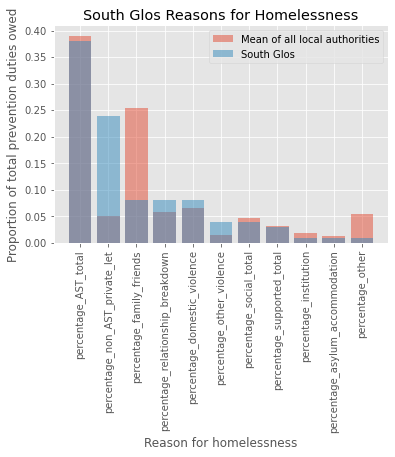

In [33]:
percentages_SG = df.loc[df['local_authority'] == 'South Gloucestershire'][df_percentages.columns[2:]].squeeze().sort_values(ascending=False)

plt.bar(percentages_mean.index, percentages_mean, label='Mean of all local authorities', alpha=0.5)
plt.bar(percentages_mean.index, percentages_SG, label='South Glos', alpha=0.5)
plt.xticks(rotation=90)
plt.title('South Glos Reasons for Homelessness')
plt.xlabel('Reason for homelessness')
plt.ylabel('Proportion of total prevention duties owed')
plt.legend()
plt.show()

In [34]:
percentages_SG.describe

<bound method NDFrame.describe of percentage_AST_total                 0.38
percentage_family_friends            0.24
percentage_relationship_breakdown    0.08
percentage_social_total              0.08
percentage_supported_total           0.08
percentage_non_AST_private_let       0.04
percentage_domestic_violence         0.04
percentage_other                     0.03
percentage_other_violence            0.01
percentage_institution               0.01
percentage_asylum_accommodation      0.01
Name: 228, dtype: float64>

In [35]:
#This function is to load the same data for more quarters, so I can do some timeseries analysis

def to_csv_A2P(yearquarter):
    # Specify path to .ods file
    file_path = "C:/Users/lucyf/Coding/Homelessness/data/DetailedLA_" + str(yearquarter) + ".ods"
    # Load the data from the A2P tab
    df = pd.read_excel(file_path, sheet_name="A2P")
    # Specify the path to save the CSV file
    output_path = "C:/Users/lucyf/Coding/Homelessness/data/A2P_" + str(yearquarter) + ".csv"
    # Save the data as a CSV file
    df.to_csv(output_path, index=False)
    #Load the CSV into Pandas
    return pd.read_csv(output_path)

In [36]:
#I have commented out this cell as it was slowing down my program. I have run it once and saved the resultant data to a new csv.
#This goes through each downloaded spreadsheet to save the A2P tab as a csv file, then runs it through the cleaning function

"""df_22Q3_A2P = to_csv_A2P(202212)
df_22Q3_A2P = clean_df_A2P(df_22Q3_A2P, 2022, 3)

df_22Q2_A2P = to_csv_A2P(202209)
df_22Q2_A2P = clean_df_A2P(df_22Q2_A2P, 2022, 2)

df_22Q1_A2P = to_csv_A2P(202206)
df_22Q1_A2P = clean_df_A2P(df_22Q1_A2P, 2022, 1)

df_21Q4_A2P = to_csv_A2P(202203)
df_21Q4_A2P = clean_df_A2P(df_21Q4_A2P, 2021, 4)

df_21Q3_A2P = to_csv_A2P(202112)
df_21Q3_A2P = clean_df_A2P(df_21Q3_A2P, 2021, 3)

df_21Q2_A2P = clean_df_A2P(to_csv_A2P(202109), 2021, 2)

df_21Q1_A2P = clean_df_A2P(to_csv_A2P(202106), 2021, 1)

df_20Q4_A2P = clean_df_A2P(to_csv_A2P(202103), 2020, 4)

df_20Q3_A2P = clean_df_A2P(to_csv_A2P(202012), 2020, 3)

df_20Q2_A2P = clean_df_A2P(to_csv_A2P(202009), 2020, 2)

df_20Q1_A2P = clean_df_A2P(to_csv_A2P(202006), 2020, 1)

#df_19Q4_A2P = clean_df_A2P(to_csv_A2P(202003), 2019, 4)
#df_19Q3_A2P = clean_df_A2P(to_csv_A2P(201912), 2019, 3)
#These final two spreadsheets don't have a sheet named 'A2P', so the current formula won't work. Skipping them for now.


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-36-3eaac2634e5f>, line 33)

In [ ]:
#Joining all quarters into a master dataframe

dataframes = [df_22Q3_A2P, df_22Q2_A2P, df_22Q1_A2P, df_21Q4_A2P, df_21Q3_A2P, df_21Q2_A2P, df_21Q1_A2P, df_20Q4_A2P, df_20Q3_A2P, df_20Q2_A2P, df_20Q1_A2P]

joined_df_A2P = pd.concat(dataframes, ignore_index=True)

#Saving master dataframe to my computer so I can comment out the functions above which are importing and cleaning each file

joined_df_A2P.to_csv('C:/Users/lucyf/Coding/Homelessness/data/joined_df_A2P.csv', index=False)

joined_df_A2P = pd.read_csv('C:/Users/lucyf/Coding/Homelessness/data/joined_df_A2P.csv')

In [ ]:
total_per_quarter = joined_df_A2P.groupby(['year', 'quarter'])['total_prevention_duty'].sum()

total_per_quarter

In [ ]:
print(total_per_quarter.index)
total_per_quarter.index = total_per_quarter.index.map(lambda x: f"Q{x[1]}-{x[0]}")

print(total_per_quarter.index)

In [ ]:
print(total_per_quarter.values)

In [ ]:
#Line chart showing how the total number of prevention cases have changed over time

plt.plot(total_per_quarter.index, total_per_quarter.values)
plt.xticks(rotation=45)
plt.ylabel('Total Prevention Cases')
plt.xlabel('Year - Quarter')
plt.title('Total Prevention Cases Over Time')
plt.show()

In [ ]:
#Which authorities have the highest percentage of homelessness from the private sector?

#Filter to just show authorities with over 150 prevention cases per quarter. These percentages will be more meaningful.
over_150_preventions = joined_df_A2P[joined_df_A2P['total_prevention_duty'] > 150]

#For each authority, average the percentage of homelessness from AST across the quarters
to_plot = over_150_preventions.groupby('local_authority')['percentage_AST_total'].mean().sort_values()

#Plot onto a bar chart

fig, ax = plt.subplots(figsize=(16, 25))
ax.barh(to_plot.index, to_plot)
plt.title('Percentage of homelessness from private sector')
plt.xlabel('Percentage of prevention duties due to end of AST')
plt.ylabel('Local Authority')
plt.xticks(np.arange(0, 1.1, 0.1))
ax.tick_params(labeltop=True)
plt.ylim(-1, 112)
plt.show()

In [ ]:
#Now import and clean the same data but tab P2 (successful preventions by accommodation)

def to_csv_P2(yearquarter):
    # Specify path to .ods file
    file_path = "C:/Users/lucyf/Coding/Homelessness/data/DetailedLA_" + str(yearquarter) + ".ods"
    # Load the data from the A2P tab
    df = pd.read_excel(file_path, sheet_name="P2")
    # Specify the path to save the CSV file
    output_path = "C:/Users/lucyf/Coding/Homelessness/data/P2_" + str(yearquarter) + ".csv"
    # Save the data as a CSV file
    df.to_csv(output_path, index=False)
    #Load the CSV into Pandas
    return pd.read_csv(output_path)

In [ ]:
def clean_df_P2(df, year, quarter):
    
    #Dropping blank spacer columns
    blank_columns = df.columns[df.isnull().sum() == df.shape[0]].tolist()
    df.drop(blank_columns, axis=1, inplace=True)
    
    #Dropping blank, header and note rows
    df.dropna(subset=[df.columns[0]], axis=0, inplace=True)
    df = df[df[df.columns[0]].str.contains('^E\d')]
    
    #Renaming columns
    df.columns=['ONS_code', 'local_authority', 'total_successful_prevention', 'total_PRS', 'PRS_sc', 'PRS_HMO', 'PRS_lodging', 'total_SRS', 'SRS_council', 'SRS_RP', 'SRS_supported', 'family', 'friends', 'owner_occupier', 'other', 'not_known']
    
    #Removing the aggregated regional data
    region_df = df[:11]
    df = df[11:]
    df = df.reset_index(drop=True)
    
    #Finding null values and replacing the string representation
    for column in df.columns[2:]:
        df[column].replace("..", np.nan, inplace=True)
        df[column] = df[column].astype(float)
    
    #Setting new columns with the relevant year and quarter
    df['year'] = int(year)
    df['quarter'] = int(quarter)
    
    #Filling null values with the mean of the column
    for column in df:
        if df[column].isnull().sum() >0:
            df[column].fillna(round(df[column].mean()), inplace=True)
    
    #Adding columns showing percentage of total for each reason for homelessness
    df_categories = df[['total_PRS', 'PRS_sc', 'PRS_HMO', 'PRS_lodging', 'total_SRS', 'SRS_council', 'SRS_RP', 'SRS_supported', 'family', 'friends', 'owner_occupier', 'other', 'not_known']]
    homelessness_reasons = df_categories.columns[3:]
    for column in homelessness_reasons:
        df['percentage_' + column] = (df[column] / df['total_successful_prevention']).round(2)
   
    return df #, region_df

In [ ]:
#Commenting out this cell now that the new joined dataframe has been created and saved as a csv, as it is very slow to run

"""df_22Q3_P2 = clean_df_P2(to_csv_P2(202212), 2022, 3)

df_22Q2_P2 = clean_df_P2(to_csv_P2(202209), 2022, 2)

df_22Q1_P2 = clean_df_P2(to_csv_P2(202206), 2022, 1)

df_21Q4_P2 = clean_df_P2(to_csv_P2(202203), 2021, 4)

df_21Q3_P2 = clean_df_P2(to_csv_P2(202112), 2021, 3)

df_21Q2_P2 = clean_df_P2(to_csv_P2(202109), 2021, 2)

df_21Q1_P2 = clean_df_P2(to_csv_P2(202106), 2021, 1)

df_20Q4_P2 = clean_df_P2(to_csv_P2(202103), 2020, 4)

df_20Q3_P2 = clean_df_P2(to_csv_P2(202012), 2020, 3)

df_20Q2_P2 = clean_df_P2(to_csv_P2(202009), 2020, 2)

df_20Q1_P2 = clean_df_P2(to_csv_P2(202006), 2020, 1)

In [ ]:
#Joining all quarters into a master dataframe

dataframes = [df_22Q3_P2, df_22Q2_P2, df_22Q1_P2, df_21Q4_P2, df_21Q3_P2, df_21Q2_P2, df_21Q1_P2, df_20Q4_P2, df_20Q3_P2, df_20Q2_P2, df_20Q1_P2]

joined_df_P2 = pd.concat(dataframes)

#Saving master dataframe to my computer so I can comment out the functions above which are importing and cleaning each file

joined_df_P2.to_csv('C:/Users/lucyf/Coding/Homelessness/data/joined_df_P2.csv', index=False)

joined_df_P2 = pd.read_csv('C:/Users/lucyf/Coding/Homelessness/data/joined_df_P2.csv')

In [ ]:
print(joined_df_P2.head())
print(joined_df_P2.tail())